Train Data Columns: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')
Test Data Columns: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')
Column Names: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Epoch 1/50


C:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0613 - mae: 0.1773 - val_loss: 0.0153 - val_mae: 0.0960
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0145 - mae: 0.0946 - val_loss: 0.0123 - val_mae: 0.0883
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0120 - mae: 0.0863 - val_loss: 0.0079 - val_mae: 0.0703
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0112 - mae: 0.0830 - val_loss: 0.0086 - val_mae: 0.0734
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0105 - mae: 0.0803 - val_loss: 0.0084 - val_mae: 0.0724
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0098 - mae: 0.0778 - val_loss: 0.0085 - val_mae: 0.0733
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0096 - mae: 0.0773 - val_loss: 0.0087 - val_mae: 0.0734
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0094 - mae: 0.0761 - val_loss: 0.0077 - val_mae: 0.0694
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 14, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,485 (1.76 MB)

 Trainable params: 153,409 (599.25 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 306,820 (1.17 MB)

409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Number of units nearing failure: 0
Indices of units needing maintenance: []


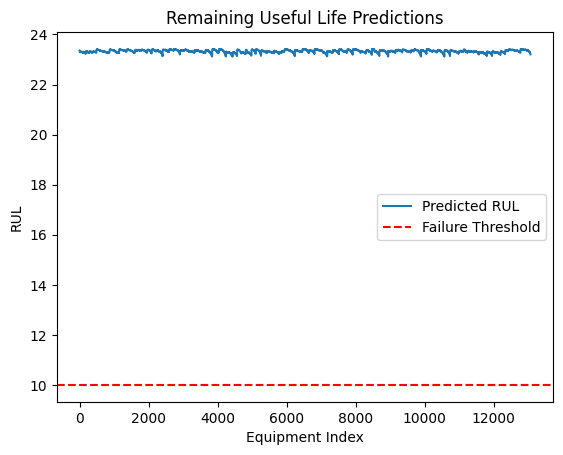

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, GRU, Bidirectional, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

# Load the dataset
train_data = pd.read_csv(r'C:\Users\asshe\Desktop\Predictive Maintenance\train_FD001.txt', sep='\s+', header=None)
test_data = pd.read_csv(r'C:\Users\asshe\Desktop\Predictive Maintenance\test_FD001.txt', sep='\s+', header=None)
rul_data = pd.read_csv(r'C:\Users\asshe\Desktop\Predictive Maintenance\RUL_FD001.txt', sep='\s+', header=None)

# Print the columns to check
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)

# Define column names
column_names = list(train_data.columns)
print("Column Names:", column_names)

# Set column names for train_data and test_data
train_data.columns = column_names
test_data.columns = column_names

# Define sequence length
sequence_length = 30

# Identify the target column (Adjust the index if necessary)
target_column_index = len(column_names) - 1  # Assuming the target is the last column

# Replace with actual column names
sensor_columns = column_names[:-1]  # All except the target column

# Normalize the sensor values
scaler = MinMaxScaler()
train_data[sensor_columns] = scaler.fit_transform(train_data[sensor_columns])
test_data[sensor_columns] = scaler.transform(test_data[sensor_columns])

# Create sequences for the RNN model
def create_sequences(df, sequence_length, target_column_index):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i+sequence_length][sensor_columns].values)
        y.append(df.iloc[i+sequence_length][target_column_index])
    return np.array(X), np.array(y)

X, y = create_sequences(train_data, sequence_length, target_column_index)
X_test, y_test = create_sequences(test_data, sequence_length, target_column_index)

# Define target scaler
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_train_scaled, test_size=0.2, random_state=42)

#CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, len(sensor_columns))))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(units=64))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # No activation function for regression
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the GRU model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

#predictions
predictions_scaled = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test = target_scaler.inverse_transform(y_test_scaled)

# Compute additional metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

# Print model summary
model.summary()

# Define failure threshold
failure_threshold = 10

# Make predictions
predicted_rul_scaled = model.predict(X_test)  # Predict RUL
predicted_rul = target_scaler.inverse_transform(predicted_rul_scaled)  # Inverse scale predictions

# Check for equipment nearing failure
nearing_failure = predicted_rul <= failure_threshold
# Output how many units need maintenance
print(f"Number of units nearing failure: {nearing_failure.sum()}")

# Identify which instances need maintenance
maintenance_required = np.where(nearing_failure)[0]
print(f"Indices of units needing maintenance: {maintenance_required}")

import matplotlib.pyplot as plt

# Plot RUL predictions
plt.plot(predicted_rul, label='Predicted RUL')
plt.axhline(y=failure_threshold, color='r', linestyle='--', label='Failure Threshold')
plt.title('Remaining Useful Life Predictions')
plt.xlabel('Equipment Index')
plt.ylabel('RUL')
plt.legend()
plt.show()